In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read file
df = pd.read_csv('/content/predictive_maintenance.csv')
df.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
# check duplicates
df.duplicated().sum()

0

**Insights**

We dont have any nulls nor do we have duplicates

**Data Dictionary**

Type:

*Meaning: Product Typ*e.
Relation to Target: Different product types may have different likelihoods or patterns of failure. The Type could be used to analyze whether certain types of products are more prone to failure, influencing the Target variable.
Air temperature [K]:

*Meaning: Air Temperature in Kelvin*.
Relation to Target: The surrounding air temperature could affect the product’s performance. Extreme or unstable air temperatures might increase the probability of failure, thereby influencing the Target.
Process temperature [K]:

*Meaning: Process Temperature in Kelvin.*
Relation to Target: This temperature reflects the operational environment of the product. Deviations from optimal process temperatures might lead to conditions that cause product failure, affecting the Target.
Rotational speed [rpm]:

*Meaning: Rotational Speed in Revolutions Per Minute.*
Relation to Target: The speed at which a component rotates can impact the likelihood of mechanical failure. High or irregular rotational speeds might increase stress on the equipment, leading to failures, which is captured in the Target variable.
Torque [Nm]:

*Meaning: Torque in Newton Meters.*
Relation to Target: Torque represents the rotational force applied by or to the product. High or inconsistent torque might indicate abnormal operating conditions, which could lead to failures, thus influencing the Target.
Tool wear [min]:

*Meaning: Tool Wear in Minutes.*
Relation to Target: This variable tracks how long a tool has been used, which directly relates to its likelihood of failure. Higher tool wear generally increases the chance of failure, making it a critical factor for predicting the Target.
Target:

*Meaning: Failure Indicator.*
Relation to Target: This is the key outcome variable that indicates whether a failure has occurred (1) or not (0). The other variables are used to predict this outcome.
Failure Type:

Meaning: Type of Failure.
*italicized text*Relation to Target: When the Target is 1, this column specifies the type of failure that occurred. Understanding the relationship between other variables and the Failure Type can help in identifying the specific conditions that lead to different types of failures.


**Summary Stats**

In [6]:
# summary stats for numerical
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


**Insights**

Means and Standard Deviations:

The mean values of the features are all on different scales, which is a strong indicator that scaling may be necessary.

The standard deviations vary significantly across features, for example, Rotational speed [rpm] has a much larger standard deviation (179.28) compared to Air temperature [K] (2.00).
Ranges:

The range of Rotational speed [rpm] is quite large, from 1168 to 2886, which might dominate other features in models if not scaled properly.

Torque [Nm] and Tool wear [min] also have considerable ranges.
Target Variable:

The Target variable is binary (0 or 1) and does not require scaling.



Highlights:

Rotational Speed [rpm] has a high mean (1538.78) and a large standard deviation (179.28), suggesting significant variability.

Tool Wear [min] shows a wide range from 0 to 253 minutes, with a high standard deviation, indicating the potential for outliers.

Torque [Nm] ranges from 3.8 to 76.6 Nm, which is also a substantial range compared to its mean (39.99) and standard deviation (9.97).

Air Temperature [K] and Process Temperature [K] have relatively small standard deviations compared to their means, indicating that these features might be more stable and less variable.

In [7]:
# categorical stats
df.describe(include='object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [11]:
# unique values for type
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [21]:
# count of unique values
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [12]:
# unique values for failure type
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

### Univariant Analysis





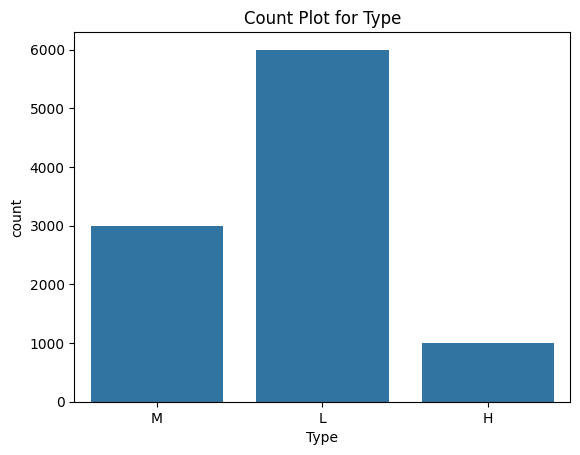

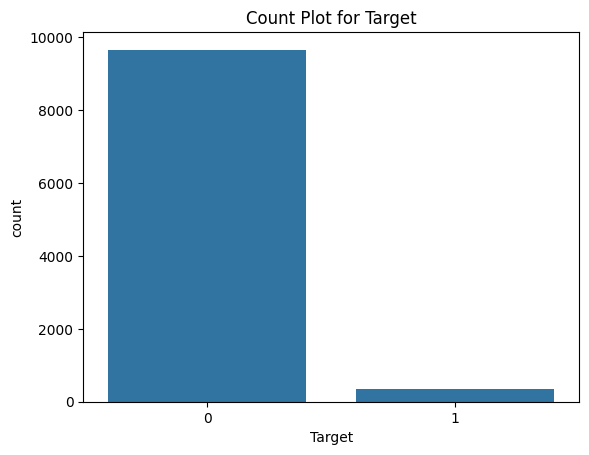

In [8]:
# prompt: count chart for categorical columns

# count plot for categorical columns
categorical_cols = ['Type', 'Target']
for col in categorical_cols:
  sns.countplot(x=col, data=df)
  plt.title(f'Count Plot for {col}')
  plt.show()


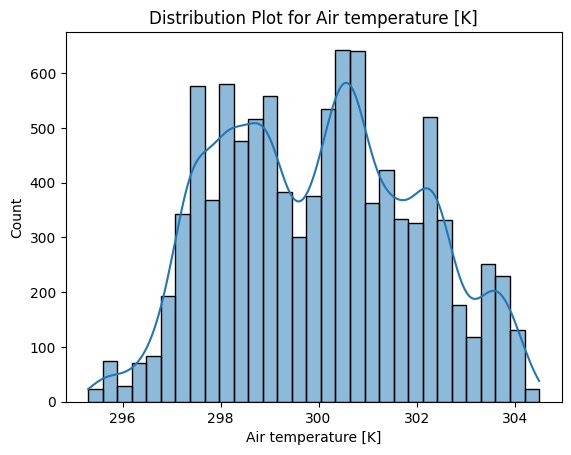

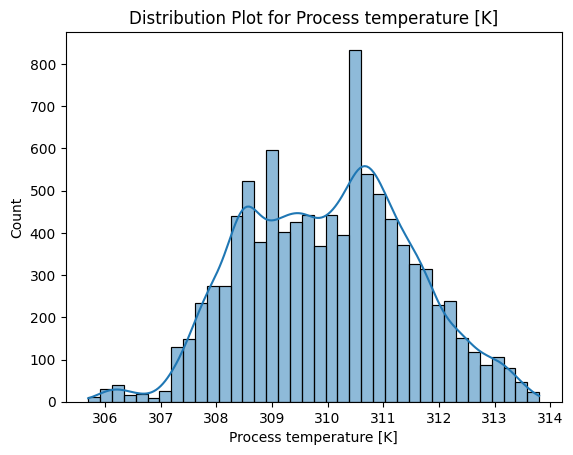

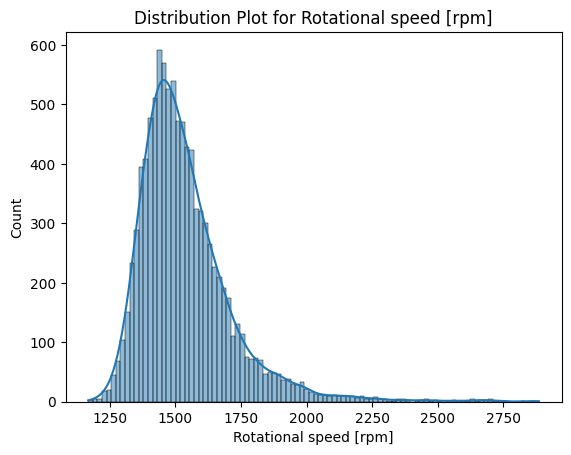

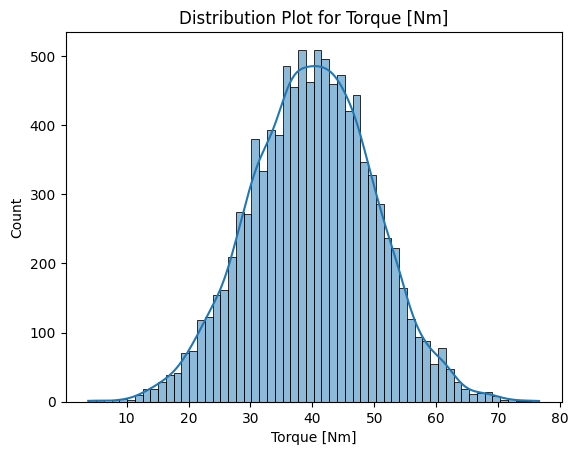

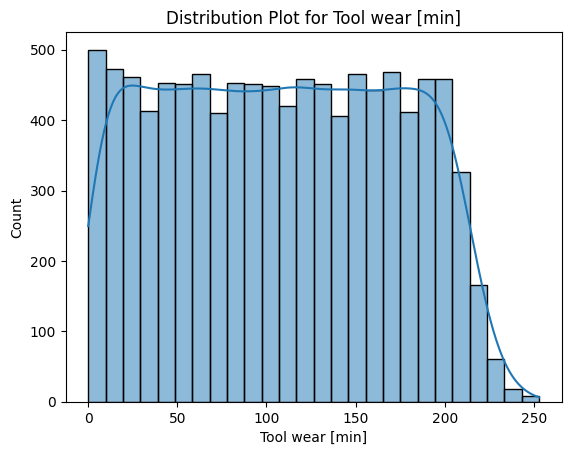

In [9]:
# prompt: bar chart with failer type and targer

sns.countplot(x='Failure Type', hue='Target', data=df)
plt.title('Bar Chart for Failure Type and Target')
plt.xticks(rotation=45, ha='right')
plt.show()


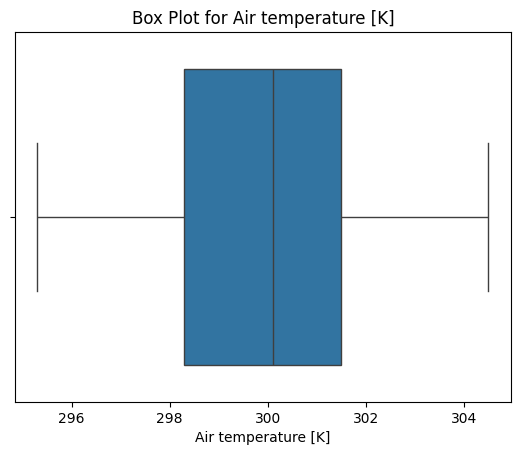

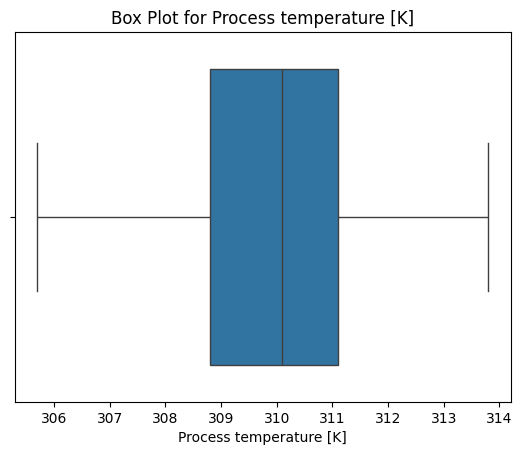

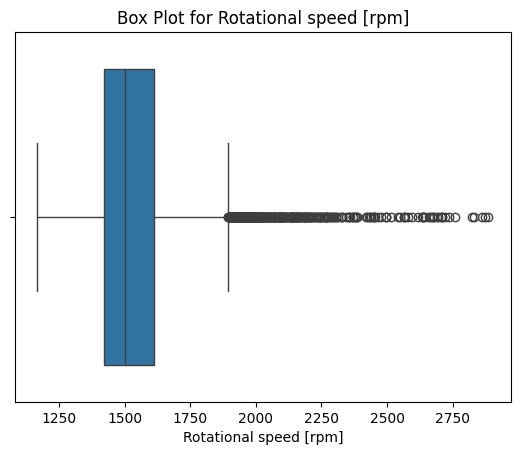

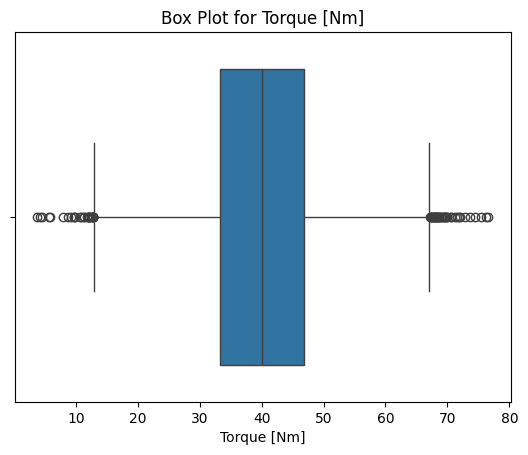

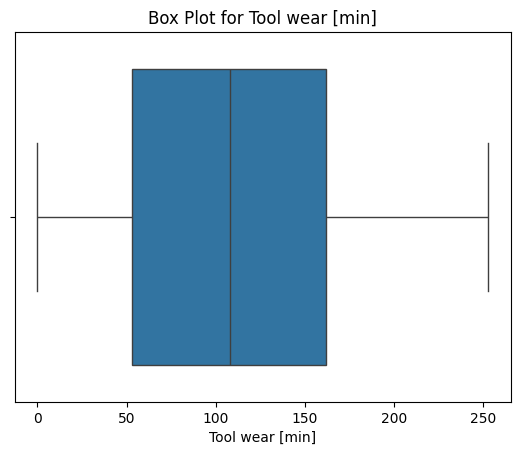

In [10]:
# prompt: create box charts

# box plot for numerical columns to check for outliers
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in numerical_cols:
  sns.boxplot(x=col, data=df)
  plt.title(f'Box Plot for {col}')
  plt.show()


**Bivariate Analysis**

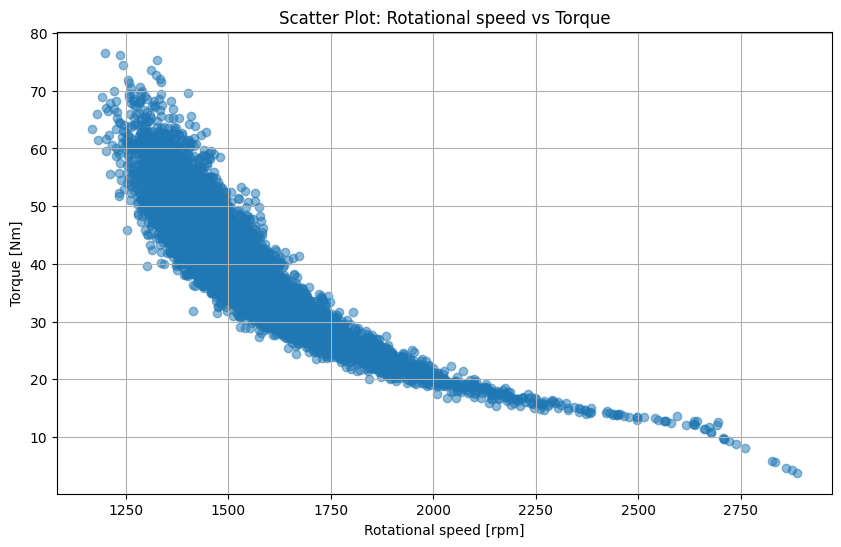

In [14]:
# Scatter plot between Rotational speed and Torque
plt.figure(figsize=(10, 6))
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'], alpha=0.5)
plt.title('Scatter Plot: Rotational speed vs Torque')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.grid(True)
plt.show()

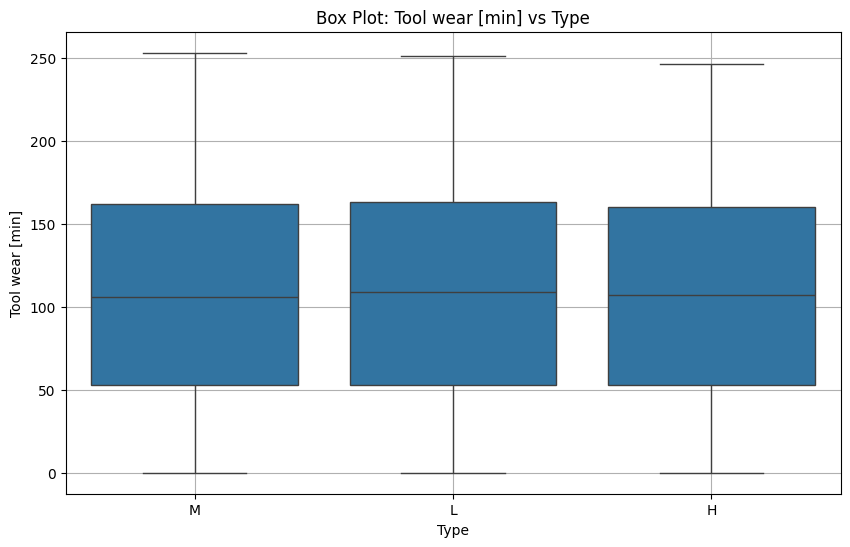

In [15]:
# Box plot of Tool wear across different Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Tool wear [min]', data=df)
plt.title('Box Plot: Tool wear [min] vs Type')
plt.xlabel('Type')
plt.ylabel('Tool wear [min]')
plt.grid(True)
plt.show()

**Insights**

The Type of product does not seem to have a significant impact on the Tool wear [min], as the distributions across the types are quite similar. This could imply that other factors might be more influential in determining the wear on the tool.

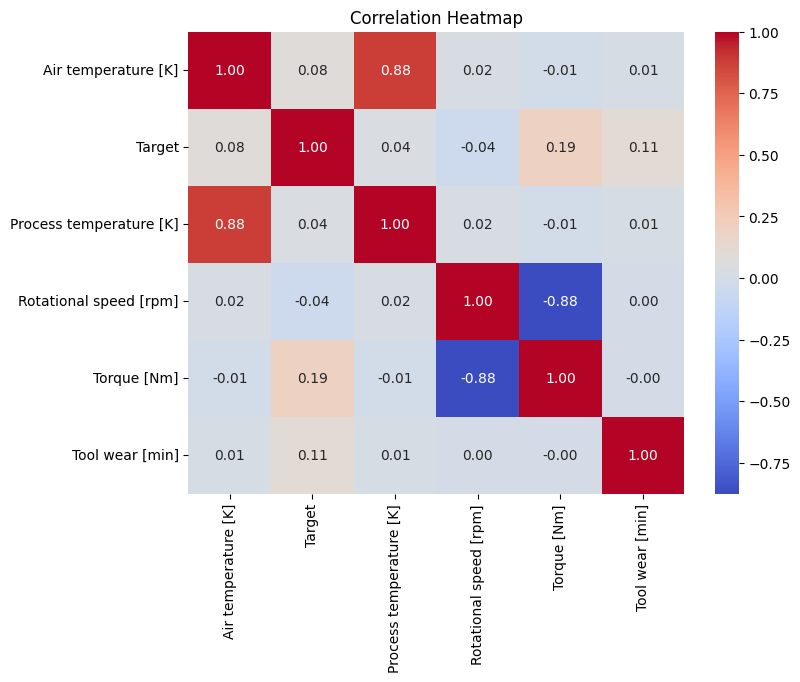

In [20]:
# Calculate correlation matrix
corr_matrix = df[['Air temperature [K]','Target', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

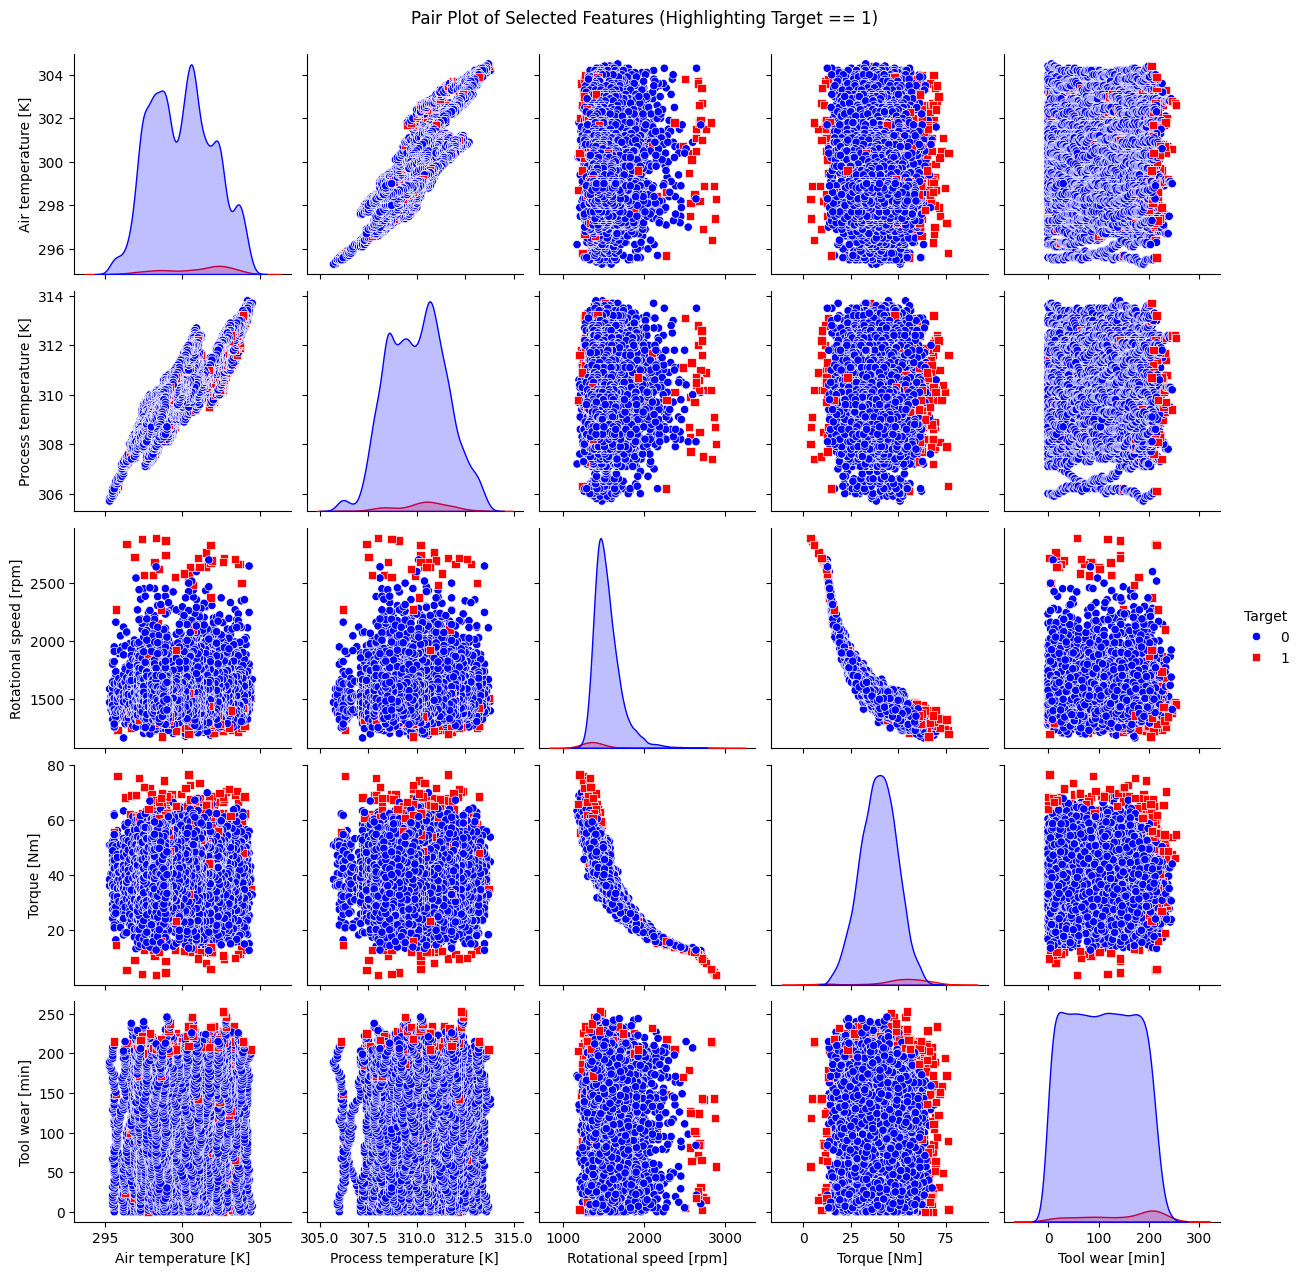

In [41]:
# prompt: update this chart to have target ==1 to stand out;# Pair plot for selected variables
# sns.pairplot(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
# plt.suptitle('Pair Plot of Selected Features', y=1.02)
# plt.show()

# Pair plot for selected variables, highlighting Target == 1
sns.pairplot(df, vars=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
             hue='Target', markers=["o", "s"], palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


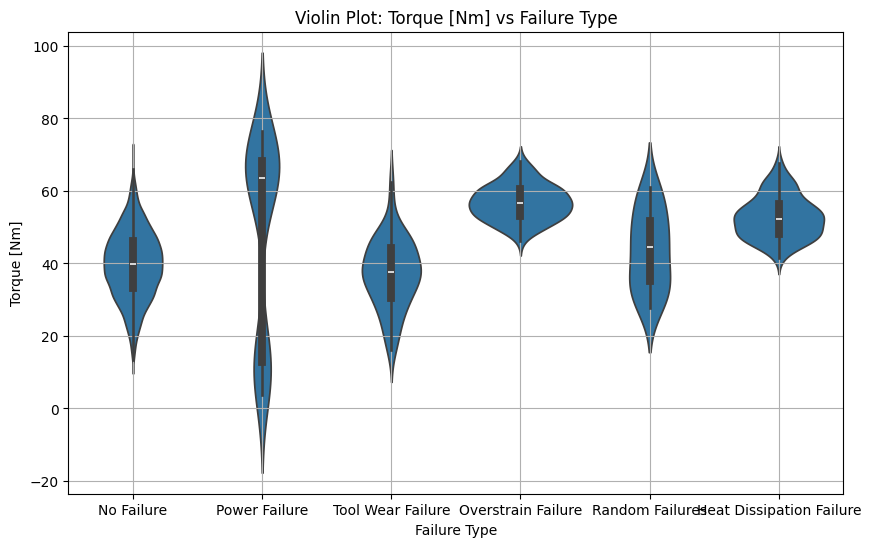

In [19]:
# Violin plot of Torque by Failure Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Failure Type', y='Torque [Nm]', data=df)
plt.title('Violin Plot: Torque [Nm] vs Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Torque [Nm]')
plt.grid(True)
plt.show()

**Insights**

Power Failures and Random Failures seem to occur at higher torque levels compared to other failure types.

Tool Wear Failures, Overstrain Failures, and Heat Dissipation Failures appear to have similar torque distributions, centered around 40 Nm.

No Failure and Tool Wear Failure share similar torque distributions, indicating that normal operation and tool wear failure may have overlapping torque characteristics.

The distribution of Torque [Nm] varies significantly across different failure types, suggesting that torque levels could be a predictive feature in identifying or distinguishing between failure modes.


<ipython-input-39-7ca03f970c71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Target']==1],x='Failure Type', palette='viridis') # Added color palette


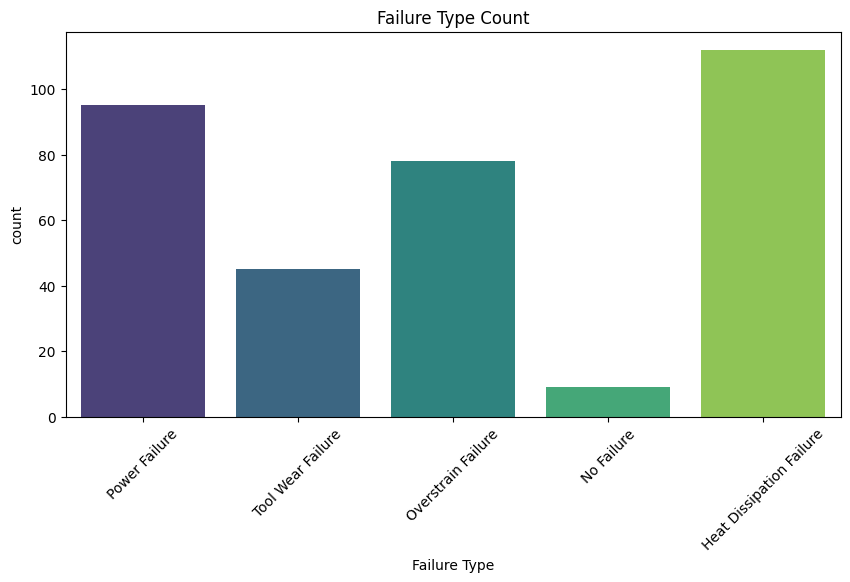

In [39]:
# prompt: add color ; # prompt: failure type count chart
# plt.figure(figsize=(10,5))
# sns.countplot(data=df[df['Target']==1],x='Failure Type')
# plt.title('Failure Type Count')
# plt.xticks(rotation=45)
# plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x='Failure Type', palette='viridis') # Added color palette
plt.title('Failure Type Count')
plt.xticks(rotation=45)
plt.show()


In [24]:
# drop product id
df.drop('Product ID', axis=1, inplace=True)

In [26]:
# drop udi
df.drop('UDI', axis=1, inplace=True)

### multivariant

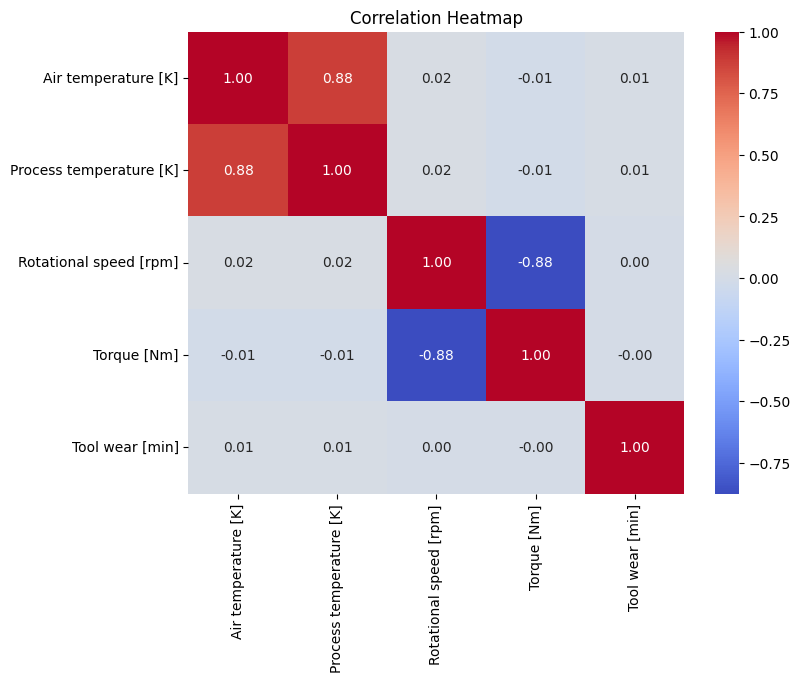

In [65]:
# Calculate correlation matrix
corr_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr() # Removed 'Faulure' as it was not in the dataframe

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
import plotly.express as px
fig = px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]', color='Target')
fig.show()

**Insights**

The plot clearly shows that failures (Target = 1) are more likely under certain conditions: specifically, higher Tool wear [min], high Rotational Speed,
 and Torque [Nm].

 The Chart suggests that as tools wear out torque increases, and rotational speed increase the likelihood of failure increases.


## Feature Engineering

using StandardScaler

In [45]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler




# Select numerical columns for scaling (include 'nf' here)
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                 'Torque [Nm]', 'Tool wear [min]', ]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [50]:
# prompt: rename type to failure

df.rename(columns={'Type': 'Failure'}, inplace=True)





In [52]:
df.rename(columns={'Failure': 'Type'}, inplace=True)

**Why Standardization**

Features have different units and widley vary on scale in the dataset.

In [53]:
# one hot and coding for objects
df = pd.get_dummies(df, columns=['Type','Failure Type'])

In [54]:
# rename Target to Failure
df.rename(columns={'Target': 'Failure'}, inplace=True)

In [56]:
# Identify columns with string values (object dtype)
object_cols = X.select_dtypes(include='object').columns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   UDI                                    10000 non-null  int64  
 1   Product ID                             10000 non-null  object 
 2   Air temperature [K]                    10000 non-null  float64
 3   Process temperature [K]                10000 non-null  float64
 4   Rotational speed [rpm]                 10000 non-null  float64
 5   Torque [Nm]                            10000 non-null  float64
 6   Tool wear [min]                        10000 non-null  float64
 7   Failure                                10000 non-null  int64  
 8   Type_H                                 10000 non-null  bool   
 9   Type_L                                 10000 non-null  bool   
 10  Type_M                                 10000 non-null  bool   
 11  Fai

In [58]:
# prompt: drop product id and udi

# drop product id
df.drop('Product ID', axis=1, inplace=True)
# drop udi
df.drop('UDI', axis=1, inplace=True)


### Building RandomForest and Logistic Regression

In [59]:
## importing sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = df.drop('Failure', axis=1)
y = df['Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

print("\nLogistic Regression:")
print(classification_report(y_test, logreg_predictions))
print(confusion_matrix(y_test, logreg_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

[[1939    0]
 [   2   59]]

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

[[1939    0]
 [   2   59]]


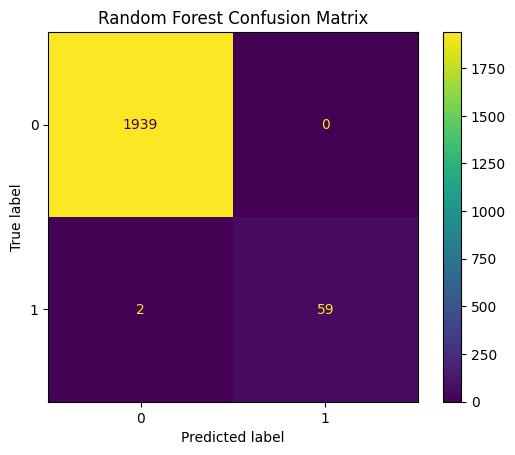

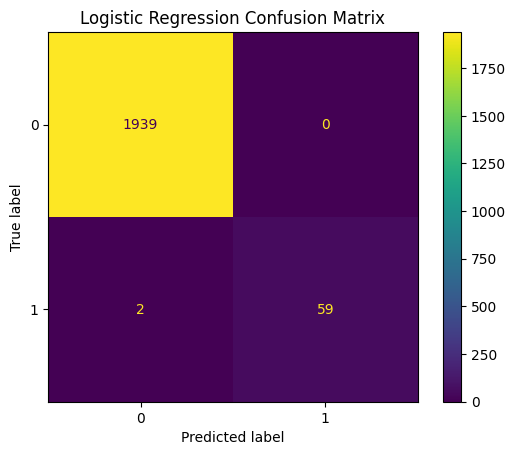

In [60]:
# prompt: chart the matrix report

from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [61]:
# prompt: use cross validation

from sklearn.model_selection import cross_val_score

# Random Forest with Cross-Validation
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

# Logistic Regression with Cross-Validation
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5)  # 5-fold cross-validation
print("\nLogistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Mean Accuracy:", logreg_cv_scores.mean())


Random Forest Cross-Validation Scores: [0.9995 0.999  0.8405 0.998  0.999 ]
Mean Accuracy: 0.9671999999999998

Logistic Regression Cross-Validation Scores: [0.9995 0.999  0.999  0.998  0.999 ]
Mean Accuracy: 0.9988999999999999


### Data Summary

The logistic regression model demonstrated exceptional performance in predicting failures, achieving an overall accuracy of 99.9%. The model accurately identified non-failures and failures, with precision and recall both at 1.00 for non-failures and 1.00 and 0.97, respectively, for failures. Despite the class imbalance, with significantly more non-failure instances than failures, the model effectively identified the majority of failure cases, missing only two out of 61. Cross-validation results further reinforced the model's robustness, with an average accuracy of 99.9% across different data folds. This suggests that the model generalizes well and is not overfitting.

Beyond just the overall performance, the analysis revealed how different features like `Rotational speed [rpm]`, `Torque [Nm]`, and `Tool wear [min]` impact failure likelihood. Higher levels of `Tool wear` and `Torque` were particularly associated with an increased risk of failure, indicating that these features are critical for predicting potential issues. The insight that failures tend to occur more frequently under specific operational conditions suggests that monitoring these variables closely can be key to preventing failures. By leveraging this model in a predictive maintenance framework, organizations can proactively address the conditions that lead to failures, thereby enhancing safety, reducing downtime, and optimizing maintenance schedules. This data-driven approach can significantly contribute to the reliability and safety of operations, minimizing risks associated with equipment failure.